In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("../data/05_cleaned_database_2024-02-15.csv", encoding = "latin-1")

C:\Users\blkbd\AppData\Local\Temp\ipykernel_25292\2063838313.py:1: DtypeWarning: Columns (6,10,11,13,14,15,16,17,18,19,20,23,24,25,26,28,29,30,31,32,33,34,35,36,37,38,40,46,47,48,49,50,51,52,53,58,59,61,62,63,64,65,67,68,69,70,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,89,91,92,94,95,96,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/05_cleaned_database_2024-02-15.csv", encoding = "latin-1")


In [5]:
data = pd.DataFrame({
    "id" : df['ï»¿"database_id"'],
    "lat" : df['decimalLatitude'],
    "long" : df['decimalLongitude']
    })

In [6]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline

data['coord'] = list(zip(data['long'], data['lat']))
data['coord'] = data['coord'].apply(Point)

In [7]:
gdata = gpd.GeoDataFrame(data, geometry = "coord")

In [8]:
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)[['SOV_A3', 'POP_EST', 'CONTINENT', 'NAME', 'GDP_MD', 'geometry']]
world = world.set_index("SOV_A3")

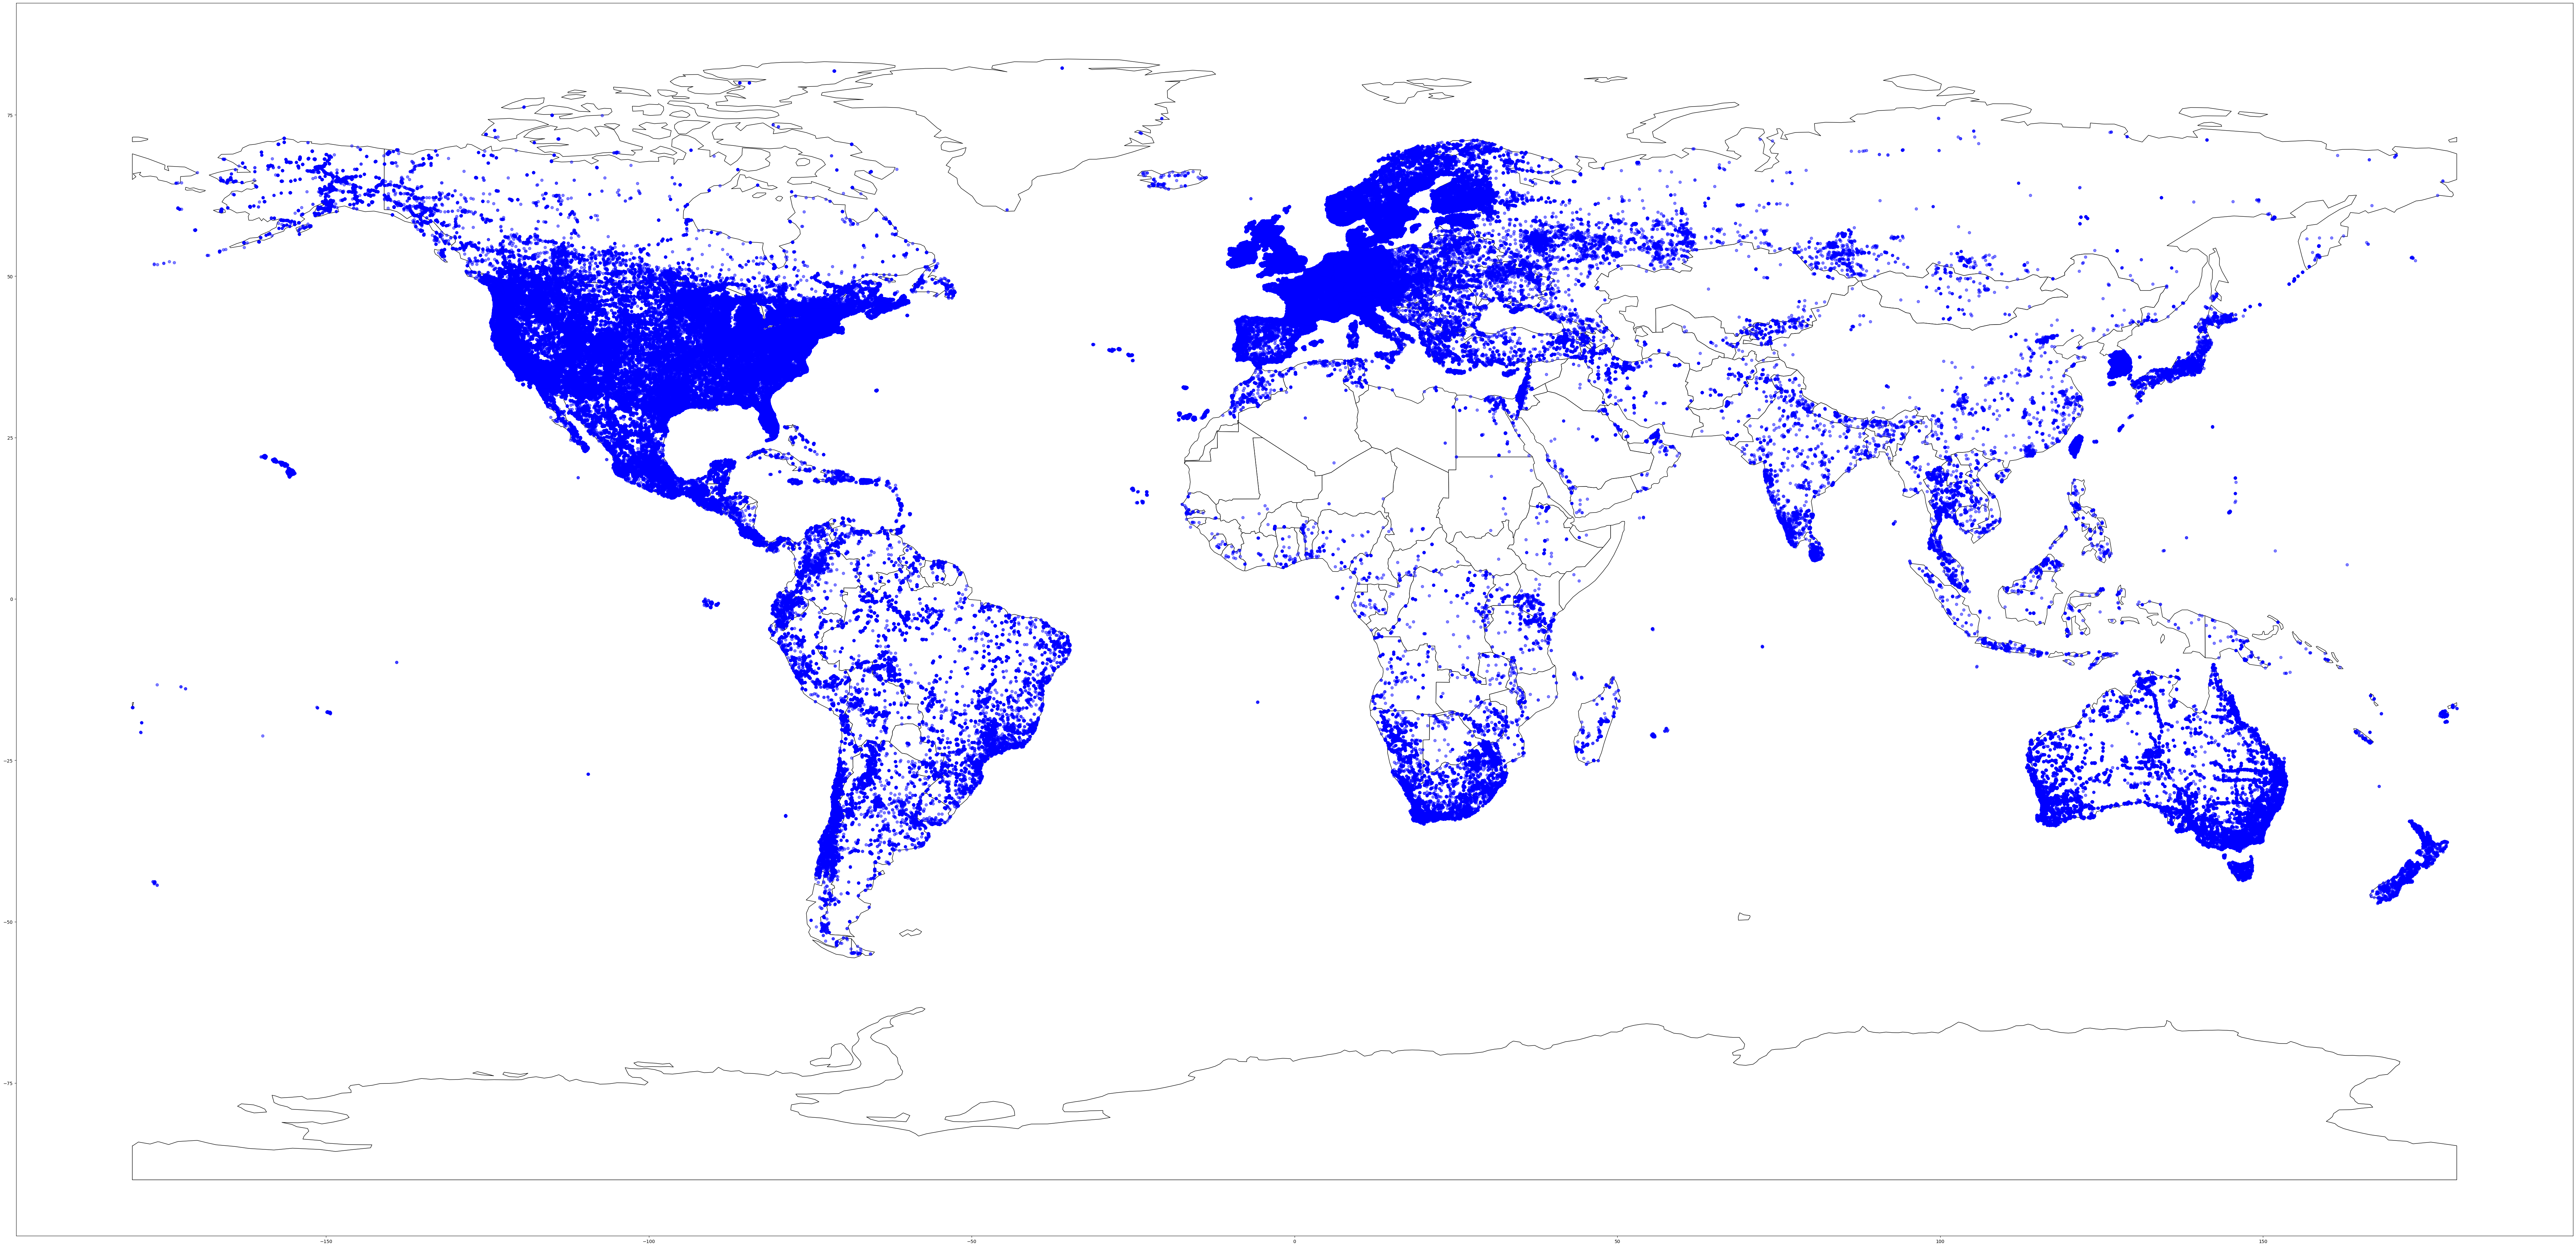

In [9]:
fig, gax = plt.subplots(figsize = (100, 100))
world.plot(ax = gax, edgecolor = 'black', color = 'white')

gdata.plot(ax = gax, color = 'blue', alpha = 0.5)

plt.savefig('../figures/lat-long-plot.png')